# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [81]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
#%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

## Question 1

To determine if the temperature measurements are approximately normal, I first plot the temp data both in a histrogram with an associated kernel desnity estimate of the pdf, as well the standardized (mean centered and standard deviation scaled) temp data in a quantile-quantile plot. These plots are available as seperate .pdf files:

/Users/scottpiraino/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


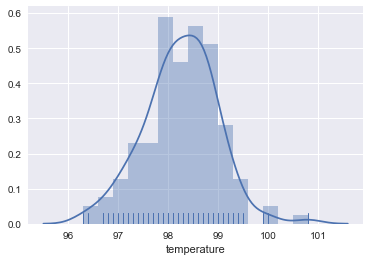

In [82]:
sb.distplot(df.temperature, bins = 15, rug = True)
plt.savefig('histogram.pdf')

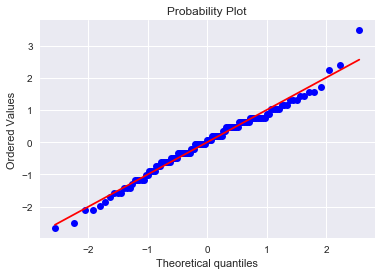

In [83]:
standard_temp = (df.temperature - df.temperature.mean())/(df.temperature.std())
temp_qq = sp.stats.probplot(standard_temp, dist="norm", plot=plt)
plt.savefig('Q-Q.pdf')

The histrogram appears approximately normal, and the Q-Q plot shows that the quantiles of the data match the theoretical quantiles fairly well.

## Question 2

I check the number of observations in the temperature data:

In [84]:
print(len(df.temperature))

130


With no apparent strong skew or strong non-normality, 130 observations should be sufficient for standard t statistics to have approximately the appropriate sampling distrubtion. There is no way to check that the observations are independent, but if each observation of temperature is taken from a differnt person and these people generally don't interact with each other, it is reasonable to think that the observations will be approximately independent.

## Question 3

We wish to test whether a group of observations has a certain mean, as opposed to whether multiple groups differ in their means, so we should use a one sample test. Since the population variance is unknown, a t-test is appropriate. I present the result of a one sample t-test against the null hypothesis that the mean body temp is 98.6 below:

In [85]:
print(df.temperature.mean())
print(df.temperature.std())
# t-test
sp.stats.ttest_1samp(df.temperature, 98.6)

98.24923076923078
0.7331831580389454


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

This indicates that the mean temperature of this data is statistically significantly differnt from 98.6. For comparison, the p-value of a z-test is:

In [86]:
# z-test
temp_z_stat = (df.temperature.mean() - 98.6)/(df.temperature.std()/(np.sqrt(len(df.temperature))))
# Test statistic is negative, so the one sided p-value is P(z < Z), 
# which is simply the standard normal cdf evaluated at the test statistic.
# I double this p-value to get the two-sided p-value.
2 * sp.stats.norm.cdf(temp_z_stat)

4.9021570141133797e-08

The p-value for the z-test is lower than the t-test, which is expected because the t distribution has heavier tails than the normal which are used to account for the additional variance in the test statistic that results from not knowing the population variance. In this case, the qualitative conclusions of the two tests are similar.

## Question 4

There are many ways that "abnormal" could be interpreted. Because the most obvious application for this data is in a medical context, I choose to construct a [reference range](https://en.wikipedia.org/wiki/Reference_range) using a [normal prediction interval](https://en.wikipedia.org/wiki/Prediction_interval#Unknown_mean.2C_unknown_variance):

In [87]:
# t-based confidence interval 
# Need to change this to predition interval
crit_t = sp.stats.t.ppf(0.975, len(df.temperature) - 1)
pi_width = crit_t * df.temperature.std() * np.sqrt((1 + 1/(len(df.temperature))))
upper_lim = df.temperature.mean() + pi_width
lower_lim = df.temperature.mean() - pi_width
#temp_sem = df.temperature.std()/(np.sqrt(len(df.temperature)))
#upper_lim = df.temperature.mean() + crit_t * temp_sem
#lower_lim = df.temperature.mean() - crit_t * temp_sem
[lower_lim, upper_lim]

[96.793041311796571, 99.705420226664984]

This interval can serve as a method of determining if an individual person's temperature is normal or abnormal. Note that this is not a confidence interval for the mean, because a confidence interval on the mean can not be validly interpreted as determining whether individual observations are normal or abnormal.

## Question 5

I conduct a two sample t-test testing the whether men and women differ in terms of mean temperature, against the null that they have the same mean temperature:

In [88]:
print(df.temperature[df.gender == "M"].mean())
print(df.temperature[df.gender == "F"].mean())
sp.stats.ttest_ind(df.temperature[df.gender == "M"], df.temperature[df.gender == "F"], equal_var = False)

98.1046153846154
98.39384615384613


Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

The results of this test indicate that the mean temperatures for men and womena are statistically significantly different, with men having a slightly lower mean temperature compared to women. Both means are below the putative 98.6 value. In the context of the question of the accuracy of the 98.6 number, the one_sample tests above indicate that this number is potentially off slightly, and there might be more accurate numbers to use as generic mean human body temperature. The two sample test indicates that men and women may differ slightly in mean body temperature, so quoting a single number may also disquise these differences. 

One the other hand, perhaps we should not be too concerned with whether the mean temperature is exactly 98.6, but whether 98.6 and reference ranges associated with it would be reasonable to use in clinical practice. Consider a reference range of the same width as the one above, but centered on 98.6 instead of the sample mean:

In [89]:
[98.6 - pi_width, 98.6 + pi_width]

[97.143810542565788, 100.0561894574342]

This interval and the interval above form two particially overlapping ranges. Temperatures in [-Inf, 96.793041311796571] U [100.0561894574342, Inf] will be considered abnormal by either interval.  Temperatures in [97.143810542565788, 99.705420226664984] will be considered normal by either interval. We could consider an individual to be misclassified due to using 98.6 as the mean temperature if their classification would be changed by using 98.6 as the mean, which occurs when the temperature falls in [96.793041311796571, 97.143810542565788] U [99.705420226664984, 100.0561894574342]. I calculate the proportion of the sample that would have been misclassified:

In [90]:
left_misclass = len(df.temperature[(df.temperature > 96.793041311796571)  & (df.temperature < 97.143810542565788)])
right_misclass = len(df.temperature[(df.temperature > 99.705420226664984)  & (df.temperature < 100.0561894574342)])
misclass_rate = (left_misclass + right_misclass)/len(df.temperature)
misclass_rate

0.06153846153846154

This is small but potentially significant in a medical context. Similar analyses are possible with regard to gender to determine how impactful using the combined mean instead of the gender-level means or the 98.6 value would be in terms of misclassification.  
  
Finally, it is worth considering whether there could be issues with the measurements. For example, perhaps the measuring device used for this sample was miscalibrated.